In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import mplcyberpunk

plt.style.use("cyberpunk")

In [2]:
def read_s3_dataset(file_name):
    s3_url = f"http://futurense-us-pathway-cleaned-datasets.s3-website-us-east-1.amazonaws.com/{file_name}"
    df = pd.read_csv(s3_url)
    
    return df

In [3]:
df1 = read_s3_dataset("TokensPaidWithoutLeadID.csv")
df2 = read_s3_dataset("TokensPaidWithLeadID.csv")

In [4]:
print(df1.head())

      Name created_date   paid_date    cohort              source  \
0  sudheer   2023-08-25  2023-08-30  cohort 1            linkedin   
1   swathi   2023-09-19  2023-10-06  cohort 1            linkedin   
2    kabir   2024-03-21  2024-03-23  cohort 2  inbound phone call   
3   vikash   2023-08-05  2023-08-14  cohort 1            linkedin   
4     amir   2023-08-07  2023-08-08  cohort 1        zoom webinar   

               agent        counsellor                           prospect_id  \
0    shaqlain sheikh  shailendra singh  d7d7ba30-8207-4a00-a2f0-72c9718a9ad7   
1              rohit             aarti  9f8bb6d3-d30e-4f73-baa8-8e1ae4dd3517   
2  siddharth goswami     aviral sharma  0acf038e-e696-11ee-807d-02e22ea38447   
3    shaqlain sheikh            zareen  aa13b8b9-cff5-41fe-a1f5-353e4c90ab04   
4    shaqlain sheikh  shailendra singh  b78be1f5-34f1-11ee-a17b-0a9468bc4542   

           status  
0  INACTIVE TOKEN  
1  INACTIVE TOKEN  
2    active token  
3  INACTIVE TOKEN  
4  I

In [5]:
df2.head()

,Name,Lead ID,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,status
0,srija,l:1501566724035844,2024-04-13,2024-05-02,cohort 2,facebook,payal dhiman,shashwat,23d84277-bb77-4b58-a9ee-2d36c4c7ac76,active token
1,satyam,d552642c-6784-4d5d-a545-0e926458e848-3,2024-03-18,2024-03-19,cohort 2,linkedin,payal dhiman,shailendra singh,9534b162-f601-4a4c-aa56-03f71d73a652,active token
2,tanya,l:900041774843171,2023-11-30,2023-12-12,cohort 2,facebook,vaibhav kumar sharma,diptikanta jena,fc411dd9-9a3c-43af-b9a4-e9155e756031,active token
3,ashish,l:1293647514650937,2023-12-06,2023-12-13,cohort 2,facebook,vaibhav kumar sharma,diptikanta jena,40deb473-11f6-4da6-9fd0-75f1f3075b86,active token
4,satheesh,l:1519452715578667,2024-02-18,2024-03-15,cohort 2,facebook,sagar tiwari,shailendra singh,b12ebd59-c99e-45c9-b278-45764fe7f5cb,active token


In [6]:
df1.dtypes

Name            object
created_date    object
paid_date       object
cohort          object
source          object
agent           object
counsellor      object
prospect_id     object
status          object
dtype: object

In [7]:
df2.dtypes

Name            object
Lead ID         object
created_date    object
paid_date       object
cohort          object
source          object
agent           object
counsellor      object
prospect_id     object
status          object
dtype: object

In [8]:
df1['agent'].describe()

count                     264
unique                     43
top       fahim moshin shaikh
freq                       37
Name: agent, dtype: object

In [9]:
df1[['created_date', 'paid_date']].describe(datetime_is_numeric=True)

,created_date,paid_date
count,264,264
unique,152,130
top,2024-01-27,2024-02-11
freq,22,7


In [10]:
df1.describe(include=[object])

,Name,created_date,paid_date,cohort,source,agent,counsellor,prospect_id,status
count,264,264,264,264,264,264,264,264,264
unique,238,152,130,2,23,43,13,264,2
top,abhishek,2024-01-27,2024-02-11,cohort 2,facebook,fahim moshin shaikh,shailendra singh,d7d7ba30-8207-4a00-a2f0-72c9718a9ad7,active token
freq,3,22,7,238,82,37,74,1,238


In [11]:
df1.isnull().sum()

Name            0
created_date    0
paid_date       0
cohort          0
source          0
agent           0
counsellor      0
prospect_id     0
status          0
dtype: int64

In [12]:
df2.isnull().sum()

Name            0
Lead ID         0
created_date    0
paid_date       0
cohort          0
source          0
agent           0
counsellor      0
prospect_id     0
status          0
dtype: int64

In [13]:
print(df1['source'].value_counts())

facebook                       82
linkedin                       48
zoom webinar                   37
1% club                        24
referral                       19
us pathway                      9
n-db                            7
futurense usp - website         7
placement drive                 6
googleads                       4
b.tech 19-20 grad               4
No Source                       4
usp support                     3
inbound phone call              1
calendly                        1
futurense employee referral     1
1% club/ b.tech 19-20 grad      1
lpu                             1
website                         1
ig                              1
fb lead ads                     1
os                              1
17th sept hot leads             1
Name: source, dtype: int64


In [14]:
df1['cohort'].value_counts()

cohort 2    238
cohort 1     26
Name: cohort, dtype: int64

In [16]:
# def filter_data(df, column_name, input_value):
#     filtered_data = df[df[column_name] == input_value]
#     return filtered_data

# print("Enter the column you want to filter by (source, agent, counsellor):")
# column_name = input().strip()

# print(f"Enter the {column_name} you want to filter by:")
# input_value = input().strip()
# df1 = filter_data(df1, column_name, input_value)
# print("Filtered Data (Without Lead ID):")
# print(df1)

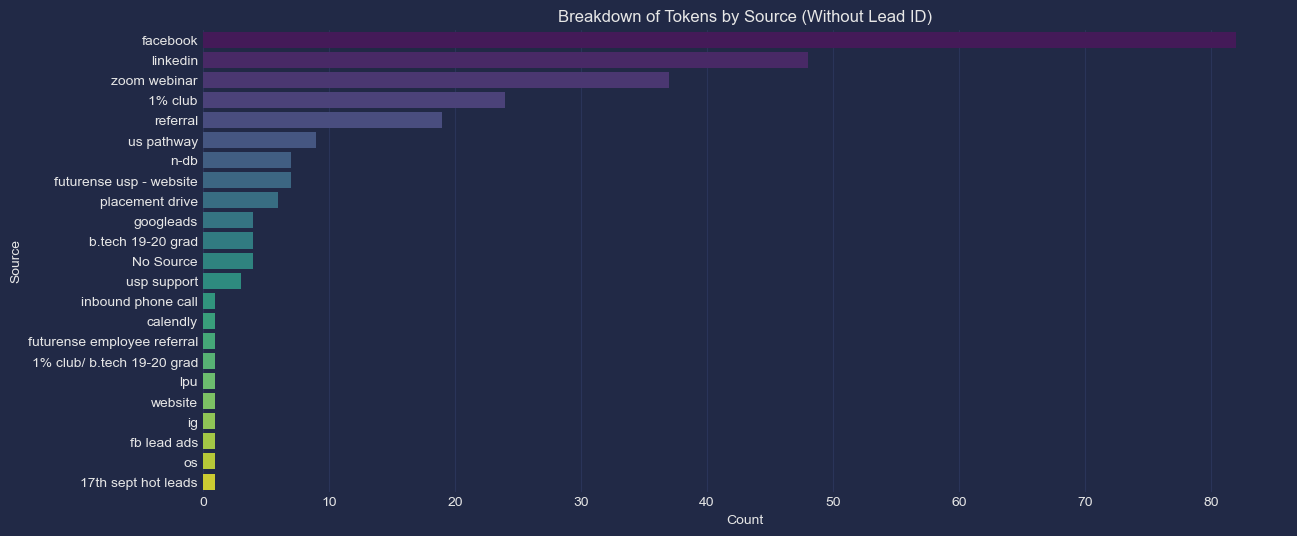

In [17]:
plt.figure(figsize=(14, 6))
sns.countplot(y='source', data=df1, order=df1['source'].value_counts().index, palette='viridis')
plt.title('Breakdown of Tokens by Source (Without Lead ID)')
plt.xlabel('Count')
plt.ylabel('Source')
plt.show()

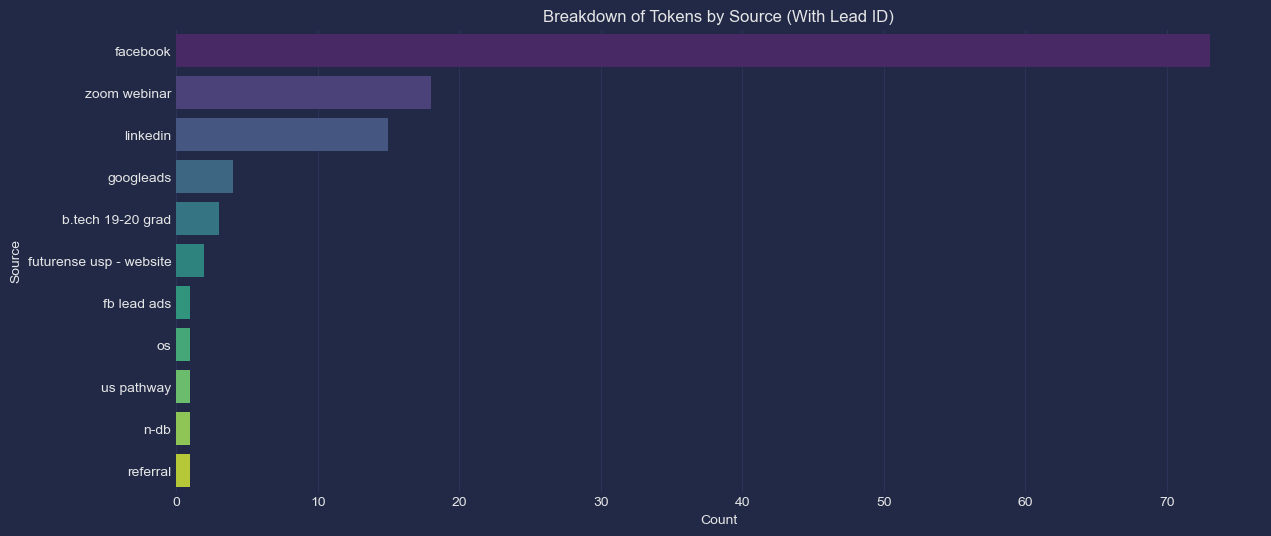

In [18]:
plt.figure(figsize=(14, 6))
sns.countplot(y='source', data=df2, order=df2['source'].value_counts().index, palette='viridis')
plt.title('Breakdown of Tokens by Source (With Lead ID)')
plt.xlabel('Count')
plt.ylabel('Source')
plt.show()

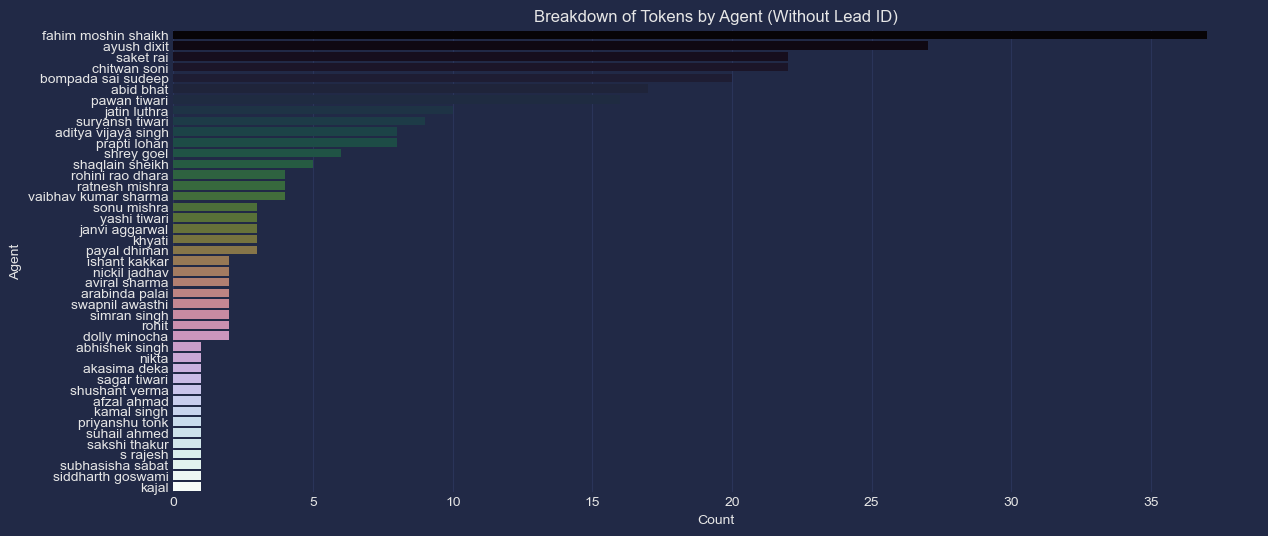

In [19]:
plt.figure(figsize=(14, 6))
sns.countplot(y='agent', data=df1, order=df1['agent'].value_counts().index, palette='cubehelix')
plt.title('Breakdown of Tokens by Agent (Without Lead ID)')
plt.xlabel('Count')
plt.ylabel('Agent')
plt.show()

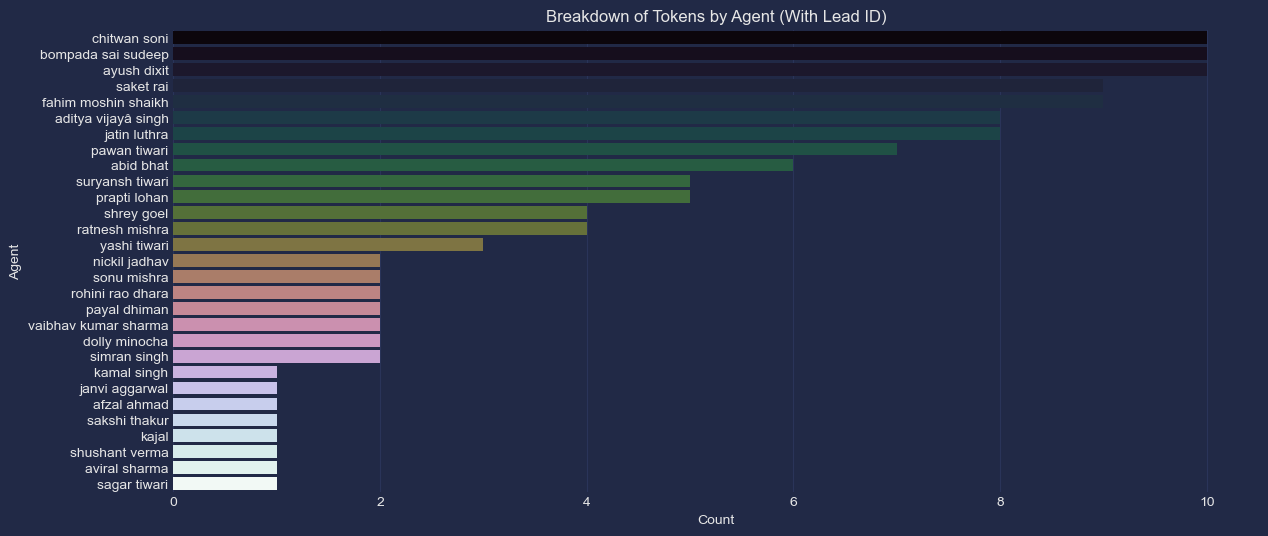

In [20]:
plt.figure(figsize=(14, 6))
sns.countplot(y='agent', data=df2, order=df2['agent'].value_counts().index, palette='cubehelix')
plt.title('Breakdown of Tokens by Agent (With Lead ID)')
plt.xlabel('Count')
plt.ylabel('Agent')
plt.show()

# Bar Plot of Tokens by Status

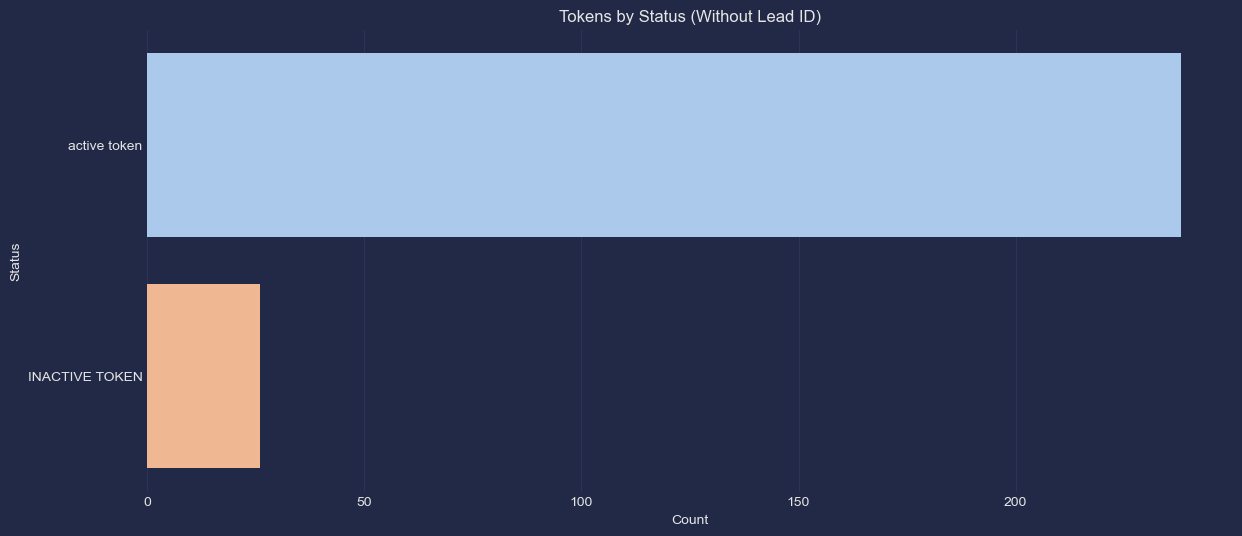

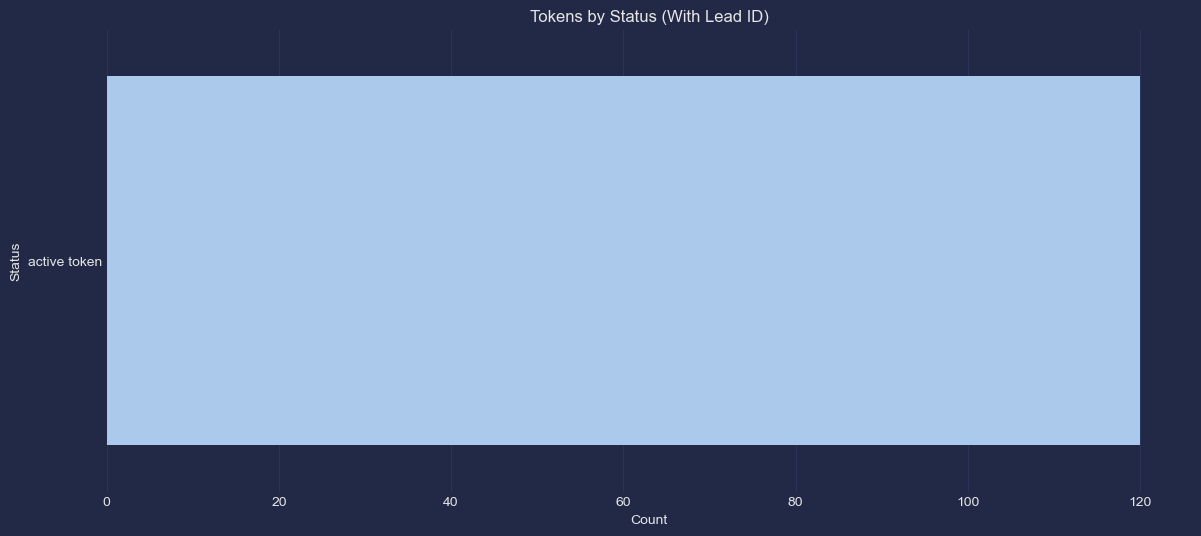

In [21]:
plt.figure(figsize=(14, 6))
sns.countplot(y='status', data=df1, order=df1['status'].value_counts().index, palette='pastel')
plt.title('Tokens by Status (Without Lead ID)')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(y='status', data=df2, order=df2['status'].value_counts().index, palette='pastel')
plt.title('Tokens by Status (With Lead ID)')
plt.xlabel('Count')
plt.ylabel('Status')
plt.show()

# Count of records per source

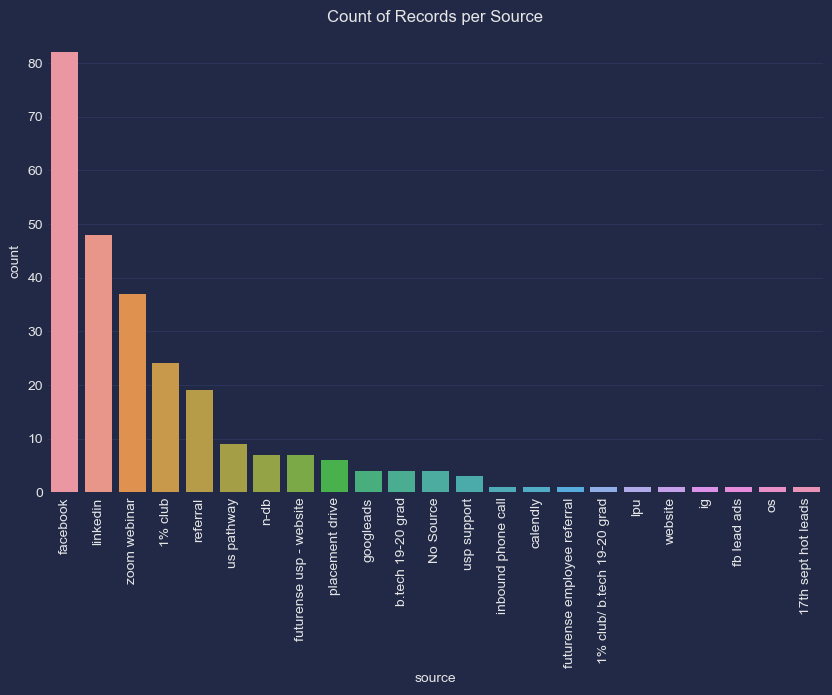

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df1, x='source', order=df1['source'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Records per Source')
plt.show()

# Number of tokens paid over time 

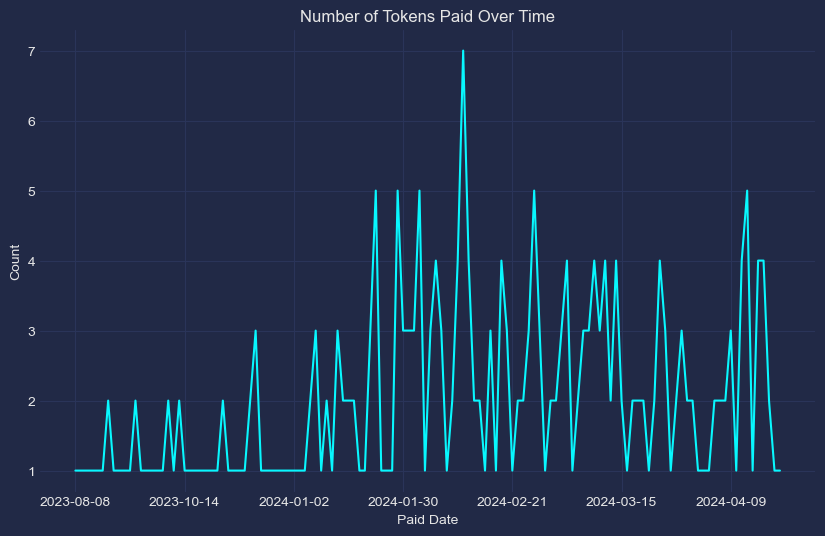

In [23]:
tokens_per_date = df1['paid_date'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
tokens_per_date.plot(kind='line')
plt.title('Number of Tokens Paid Over Time')
plt.xlabel('Paid Date')
plt.ylabel('Count')
plt.show()

# Distribution of status

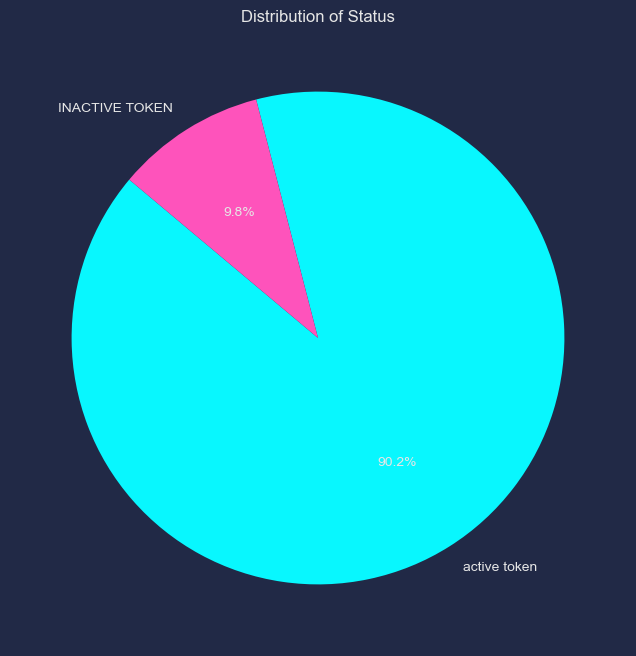

In [24]:
status_counts = df1['status'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Status')
plt.show()

# Distribution of token payment delay 

In [1]:
df1['created_date'] = pd.to_datetime(df1['created_date'])
df1['paid_date'] = pd.to_datetime(df1['paid_date'])

df1['payment_delay'] = (df1['paid_date'] - df1['created_date']).dt.days
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1, x='cohort', y='payment_delay')
plt.title('Distribution of Token Payment Delay per Cohort')
plt.xlabel('Cohort')
plt.ylabel('Payment Delay (days)')
plt.show()

NameError: name 'pd' is not defined

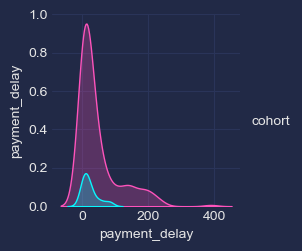

In [25]:
df1['created_date'] = pd.to_datetime(df1['created_date'])
df1['paid_date'] = pd.to_datetime(df1['paid_date'])
df1['payment_delay'] = (df1['paid_date'] - df1['created_date']).dt.days

sns.pairplot(df1[['payment_delay', 'cohort', 'source']], hue='cohort')
plt.show()

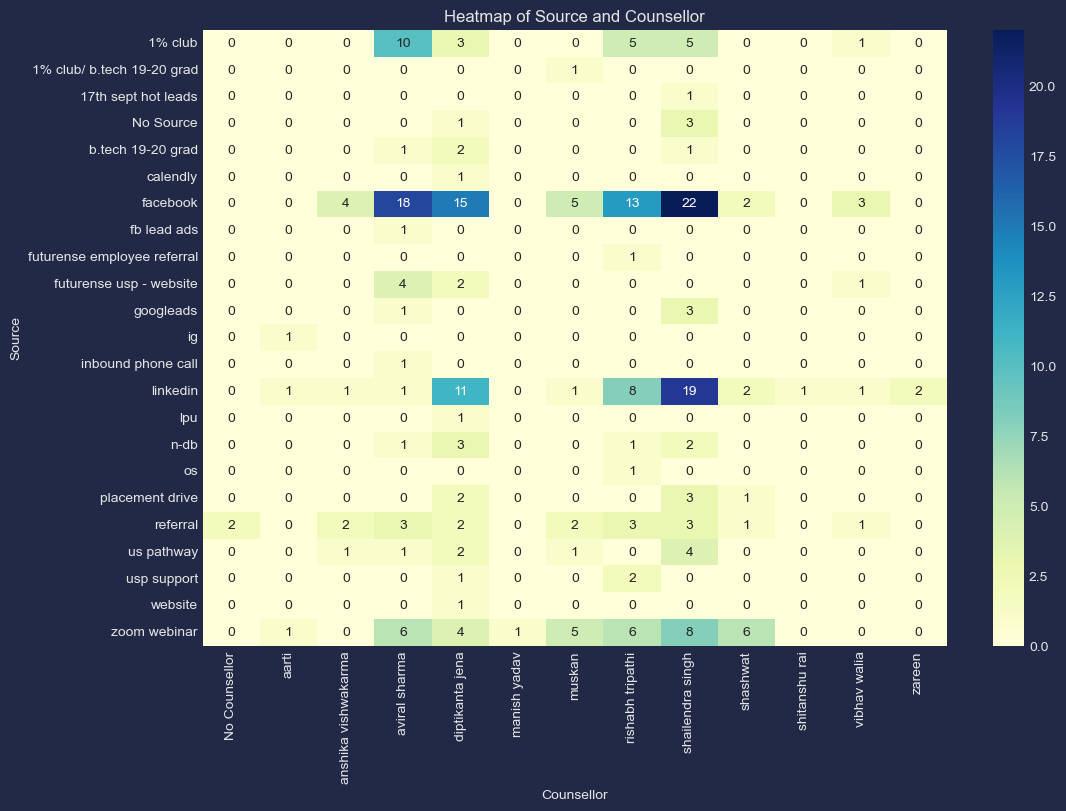

In [26]:
source_counsellor_pivot = df1.pivot_table(index='source', columns='counsellor', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(source_counsellor_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Source and Counsellor')
plt.xlabel('Counsellor')
plt.ylabel('Source')
plt.show()

# Visualization with df2 (With Lead Id)

# Count of records per agent

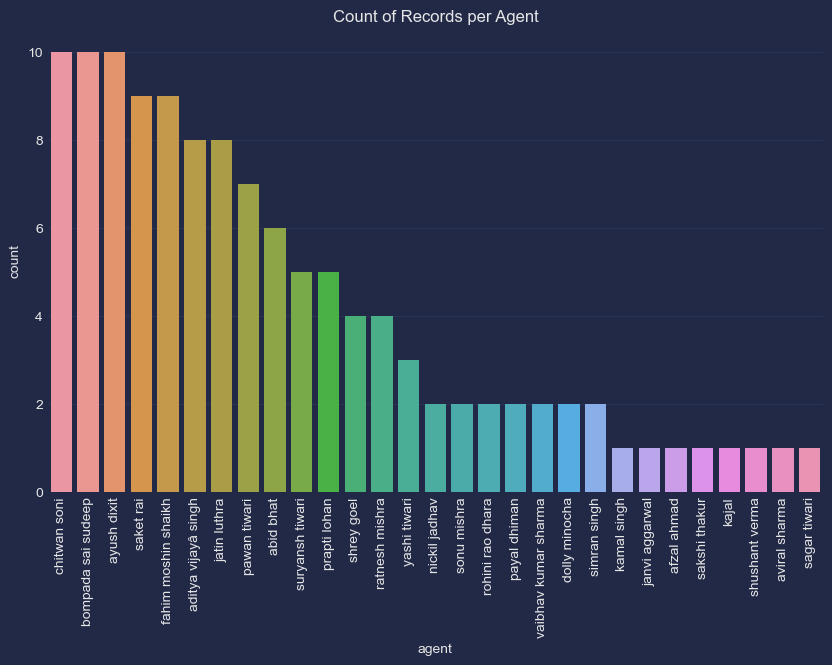

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df2, x='agent', order=df2['agent'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Records per Agent')
plt.show()

# Number of tokens paid over time "paid_date"

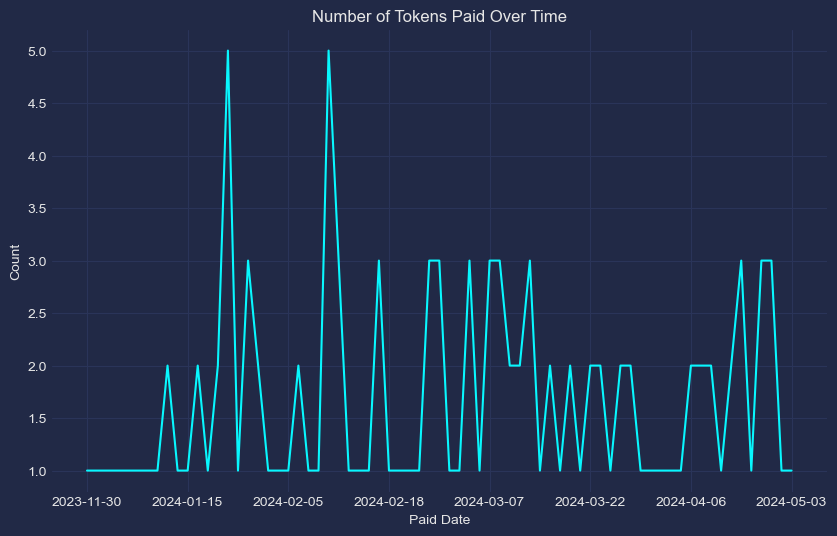

In [28]:
tokens_per_date_df2 = df2['paid_date'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
tokens_per_date_df2.plot(kind='line')
plt.title('Number of Tokens Paid Over Time')
plt.xlabel('Paid Date')
plt.ylabel('Count')
plt.show()

# Distribution of token payment delay 

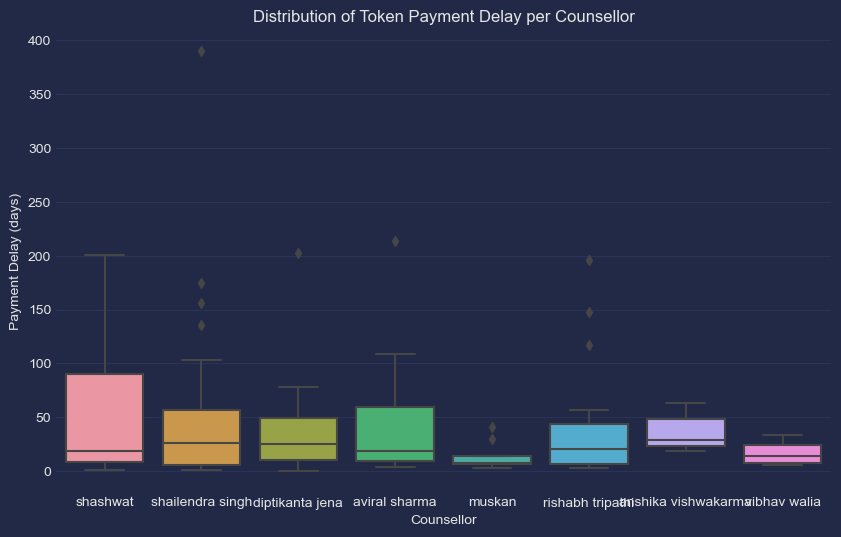

In [29]:
df2['created_date'] = pd.to_datetime(df2['created_date'])
df2['paid_date'] = pd.to_datetime(df2['paid_date'])

df2['payment_delay'] = (df2['paid_date'] - df2['created_date']).dt.days
plt.figure(figsize=(10, 6))
sns.boxplot(data=df2, x='counsellor', y='payment_delay')
plt.title('Distribution of Token Payment Delay per Counsellor')
plt.xlabel('Counsellor')
plt.ylabel('Payment Delay (days)')
plt.show()

In [2]:

plt.figure(figsize=(12, 8))
sns.stripplot(data=df2, x='cohort', y='created_date', jitter=True, dodge=True)
plt.xticks(rotation=90)
plt.title('Distribution of Created Date over Cohort')
plt.xlabel('Cohort')
plt.ylabel('Created Date')
plt.show()


NameError: name 'plt' is not defined

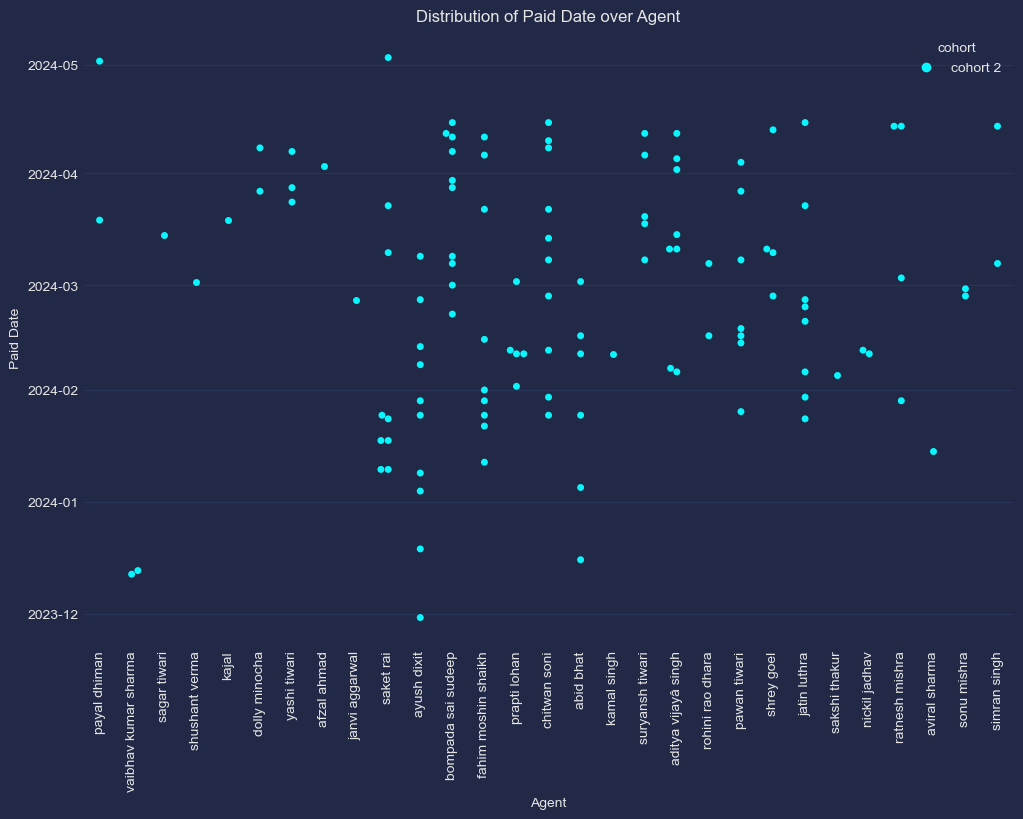

In [30]:

plt.figure(figsize=(12, 8))
sns.swarmplot(data=df2, x='agent', y='paid_date', hue='cohort')
plt.xticks(rotation=90)
plt.title('Distribution of Paid Date over Agent')
plt.xlabel('Agent')
plt.ylabel('Paid Date')
plt.show()


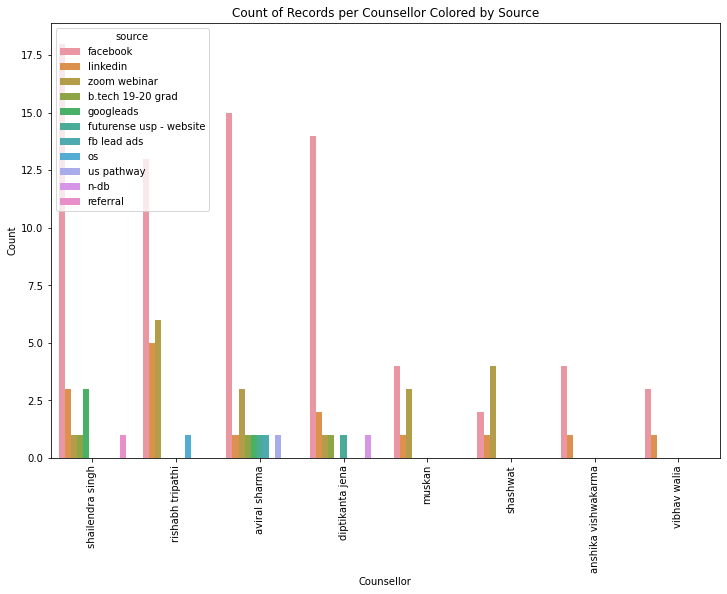

In [ ]:

# Count plot: Count of records per counsellor colored by source
plt.figure(figsize=(12, 8))
sns.countplot(data=df2, x='counsellor', hue='source', order=df2['counsellor'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Count of Records per Counsellor Colored by Source')
plt.xlabel('Counsellor')
plt.ylabel('Count')
plt.show()


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.scatterplot(x='agent', y='status', data=df1, palette='cubehelix')
plt.title('Status vs. Agent (Without Lead ID)')
plt.xlabel('Agent')
plt.ylabel('Status')
plt.xticks(rotation=90)

plt.show()


NameError: name 'df1' is not defined

<Figure size 1400x600 with 0 Axes>

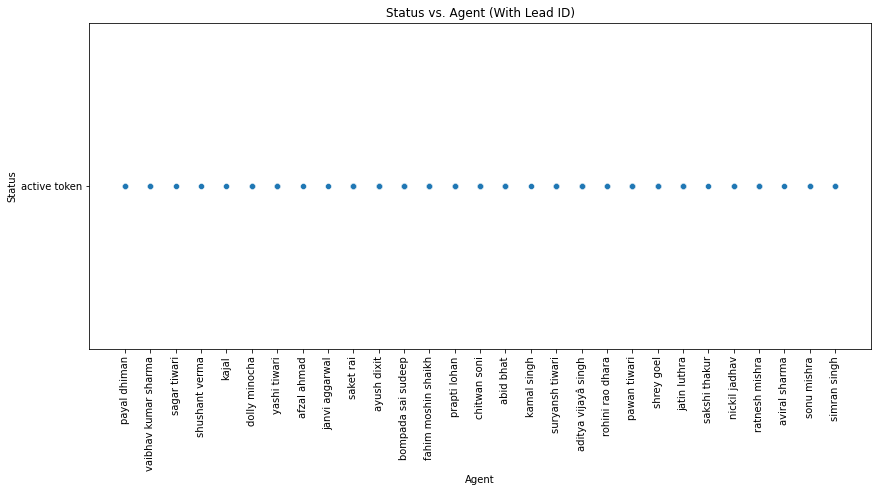

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='agent', y='status', data=df2)
plt.title('Status vs. Agent (With Lead ID)')
plt.xlabel('Agent')
plt.ylabel('Status')
plt.xticks(rotation=90)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


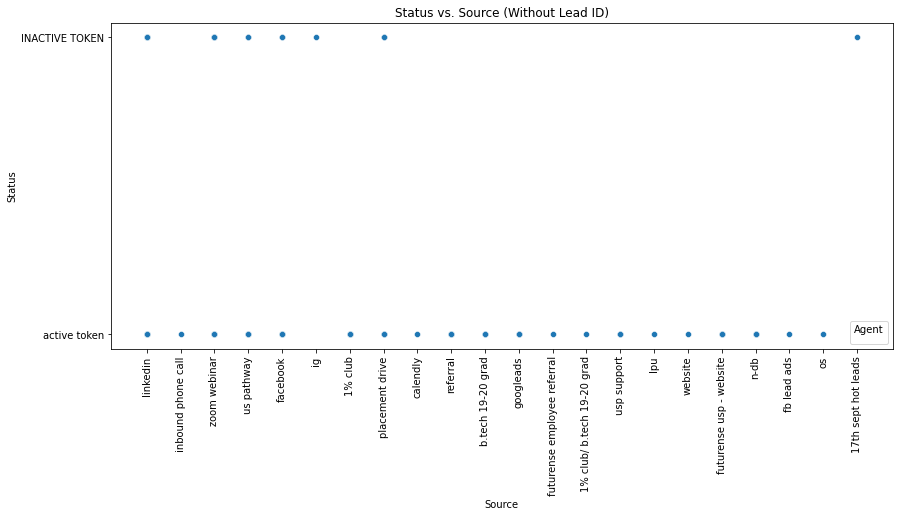

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='source', y='status', data=df1, palette='viridis')
plt.title('Status vs. Source (Without Lead ID)')
plt.xlabel('Source')
plt.ylabel('Status')
plt.xticks(rotation=90)
plt.legend(title='Agent')
plt.show()

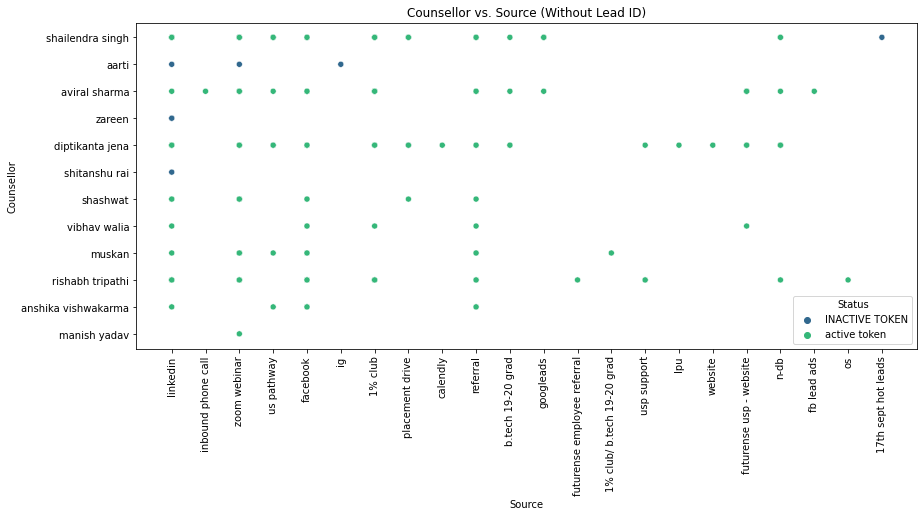

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='source', y='counsellor', data=df1, hue='status', palette='viridis')
plt.title('Counsellor vs. Source (Without Lead ID)')
plt.xlabel('Source')
plt.ylabel('Counsellor')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.show()

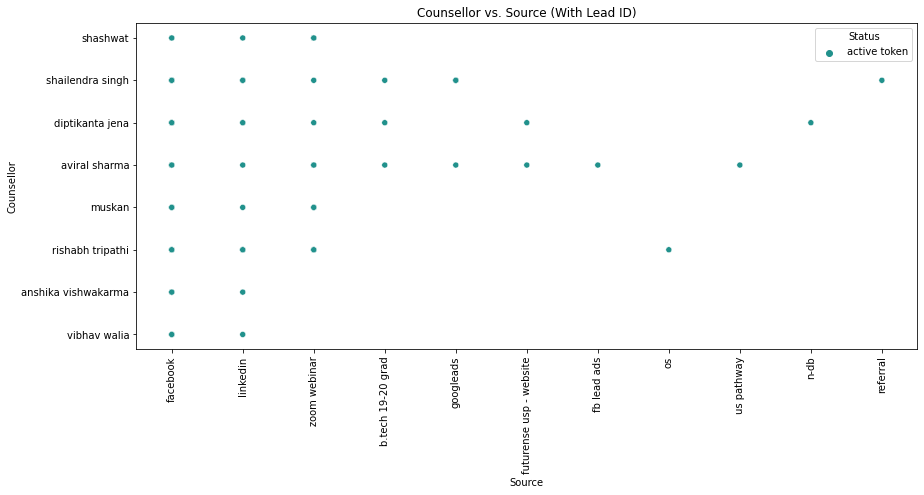

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='source', y='counsellor', data=df2, hue='status', palette='viridis')
plt.title('Counsellor vs. Source (With Lead ID)')
plt.xlabel('Source')
plt.ylabel('Counsellor')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.show()

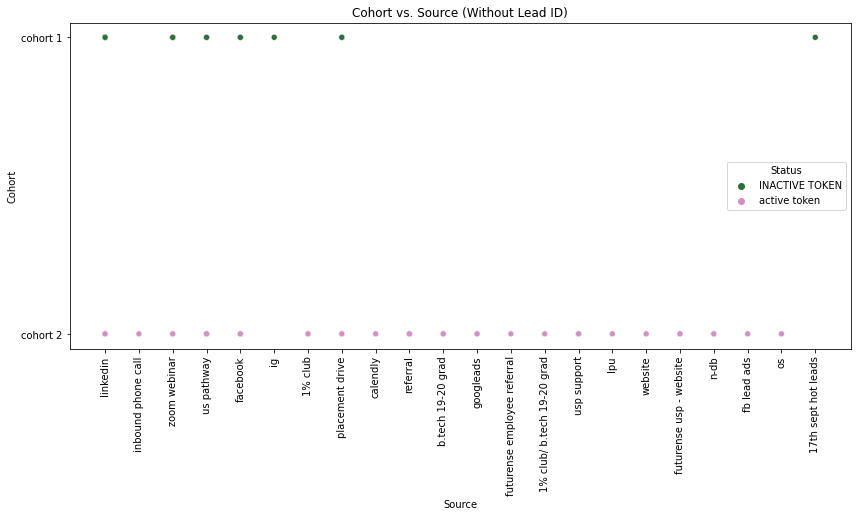

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14, 6))
sns.scatterplot(x='source', y='cohort', data=df1, hue='status', palette='cubehelix')
plt.title('Cohort vs. Source (Without Lead ID)')
plt.xlabel('Source')
plt.ylabel('Cohort')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.show()

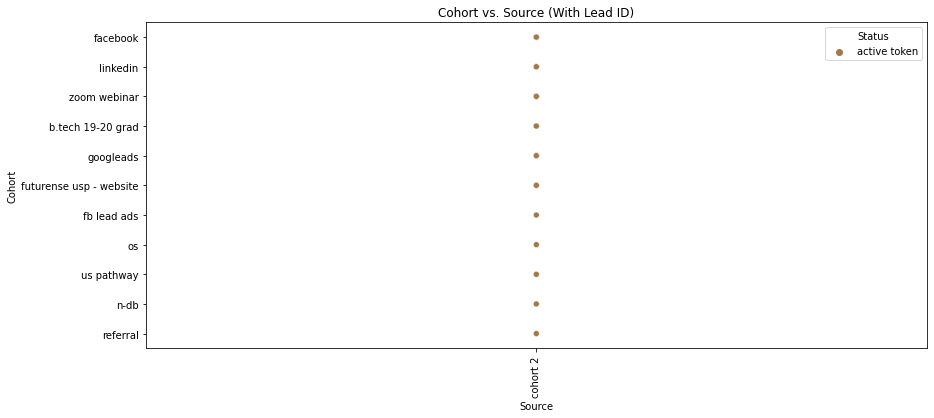

In [ ]:
plt.figure(figsize=(14, 6))
sns.scatterplot(x='cohort', y='source', data=df2, hue='status', palette='cubehelix')
plt.title('Cohort vs. Source (With Lead ID)')
plt.xlabel('Source')
plt.ylabel('Cohort')
plt.xticks(rotation=90)
plt.legend(title='Status')
plt.show()

In [ ]:
def find_outliers(df):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    Q1 = df[numeric_cols].quantile(0.25)
    Q3 = df[numeric_cols].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR)))
    
    return outliers

outliers_df1 = find_outliers(df1)
outliers_df2 = find_outliers(df2)

print("Outliers in dataset without Lead ID:")
print(df1[outliers_df1.any(axis=1)])

print("\nOutliers in dataset with Lead ID:")
print(df2[outliers_df2.any(axis=1)])


Outliers in dataset without Lead ID:
Empty DataFrame
Columns: [Name, created_date, paid_date, cohort, source, agent, counsellor, prospect_id, status]
Index: []

Outliers in dataset with Lead ID:
Empty DataFrame
Columns: [Name, Lead ID, created_date, paid_date, cohort, source, agent, counsellor, prospect_id, status]
Index: []


In [ ]:
def plot_heatmap(df, title):
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if numeric_cols.empty:
        print(f"No numeric columns in the dataset for {title}")
        return

    corr = df[numeric_cols].corr()

    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
    plt.title(title)
    plt.show()

plot_heatmap(df1, "Heatmap for Dataset without Lead ID")
plot_heatmap(df2, "Heatmap for Dataset with Lead ID")

No numeric columns in the dataset for Heatmap for Dataset without Lead ID
No numeric columns in the dataset for Heatmap for Dataset with Lead ID
